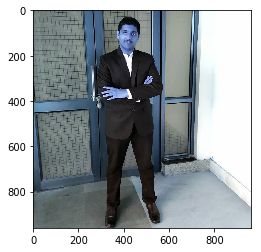

In [39]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('k.jpg')
plt.imshow(img)


In [40]:

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

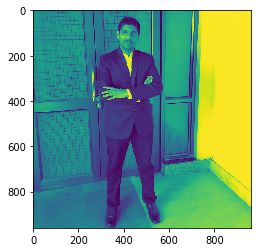

In [41]:
plt.imshow(gray)

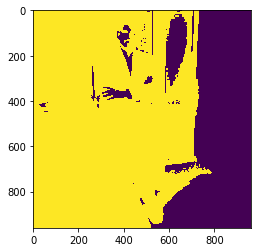

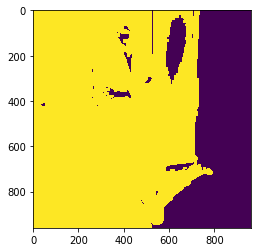

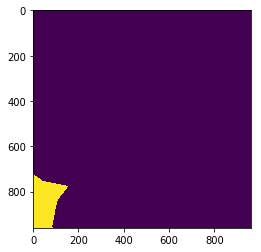

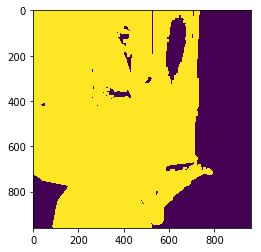

In [42]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.figure()
plt.imshow(sure_bg)
plt.imsave('test.jpg',sure_bg)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.figure()
plt.imshow(sure_fg)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.figure()
plt.imshow(unknown)

True

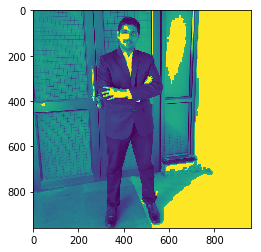

In [37]:
#load in your original image
originalImg=cv2.imread('k.jpg',0)

#load in your mask
mask=cv2.imread('test.jpg',0)

#getrid of quantization artifacts
mask[mask < 128]= 0
mask[mask > 128]= 1

#create output image
outputImg=originalImg*(mask==1)

outputImg[mask==0]=255
plt.imshow(outputImg)
cv2.imwrite('new1.jpg',outputImg)

In [43]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [44]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

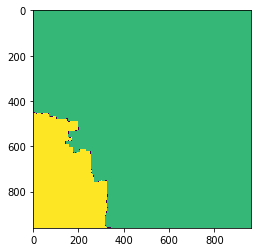

In [45]:
plt.imshow(markers)

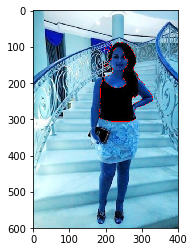

In [32]:
plt.imshow(img)